In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')

In [3]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e8/train.csv',index_col="id")
test_df = pd.read_csv('/kaggle/input/playground-series-s3e8/test.csv',index_col="id")
original_df = pd.read_csv('/kaggle/input/cubic-zirconia/cubic_zirconia.csv',index_col="Unnamed: 0")

In [4]:
original_df["Flag"] = 1
train_df["Flag"] = 0
test_df["Flag"] = 0

In [5]:
train_df = pd.concat([train_df,original_df],ignore_index=True)

In [6]:
train_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,Flag
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619,0
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387,0
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772,0
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666,0
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453,0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220540 entries, 0 to 220539
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    220540 non-null  float64
 1   cut      220540 non-null  object 
 2   color    220540 non-null  object 
 3   clarity  220540 non-null  object 
 4   depth    219843 non-null  float64
 5   table    220540 non-null  float64
 6   x        220540 non-null  float64
 7   y        220540 non-null  float64
 8   z        220540 non-null  float64
 9   price    220540 non-null  int64  
 10  Flag     220540 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 18.5+ MB


In [8]:
train_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
Flag         0
dtype: int64

In [9]:
train_df.shape

(220540, 11)

In [10]:
train_df.describe()

,carat,depth,table,x,y,z,price,Flag
count,220540.000000,219843.000000,220540.000000,220540.000000,220540.000000,220540.000000,220540.000000,220540.000000
mean,0.791628,61.811561,57.255604,5.717090,5.721742,3.534712,3965.531450,0.122277
std,0.464561,1.126671,1.961255,1.111782,1.110328,0.692876,4033.215125,0.327606
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000,0.000000
25%,0.400000,61.200000,56.000000,4.700000,4.710000,2.900000,949.000000,0.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2398.000000,0.000000
75%,1.030000,62.400000,58.000000,6.520000,6.510000,4.030000,5405.000000,0.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000,1.000000


In [11]:
train_df["x"] = train_df["x"].replace(0,train_df["x"].mean())
test_df["x"] = test_df["x"].replace(0,test_df["x"].mean())
train_df["y"] = train_df["y"].replace(0,train_df["y"].mean())
test_df["y"] = test_df["y"].replace(0,test_df["y"].mean())
train_df["z"] = train_df["z"].replace(0,train_df["z"].mean())
test_df["z"] = test_df["z"].replace(0,test_df["z"].mean())
train_df["depth"].fillna(train_df["depth"].mean(),inplace=True)

In [12]:
train_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
Flag       0
dtype: int64

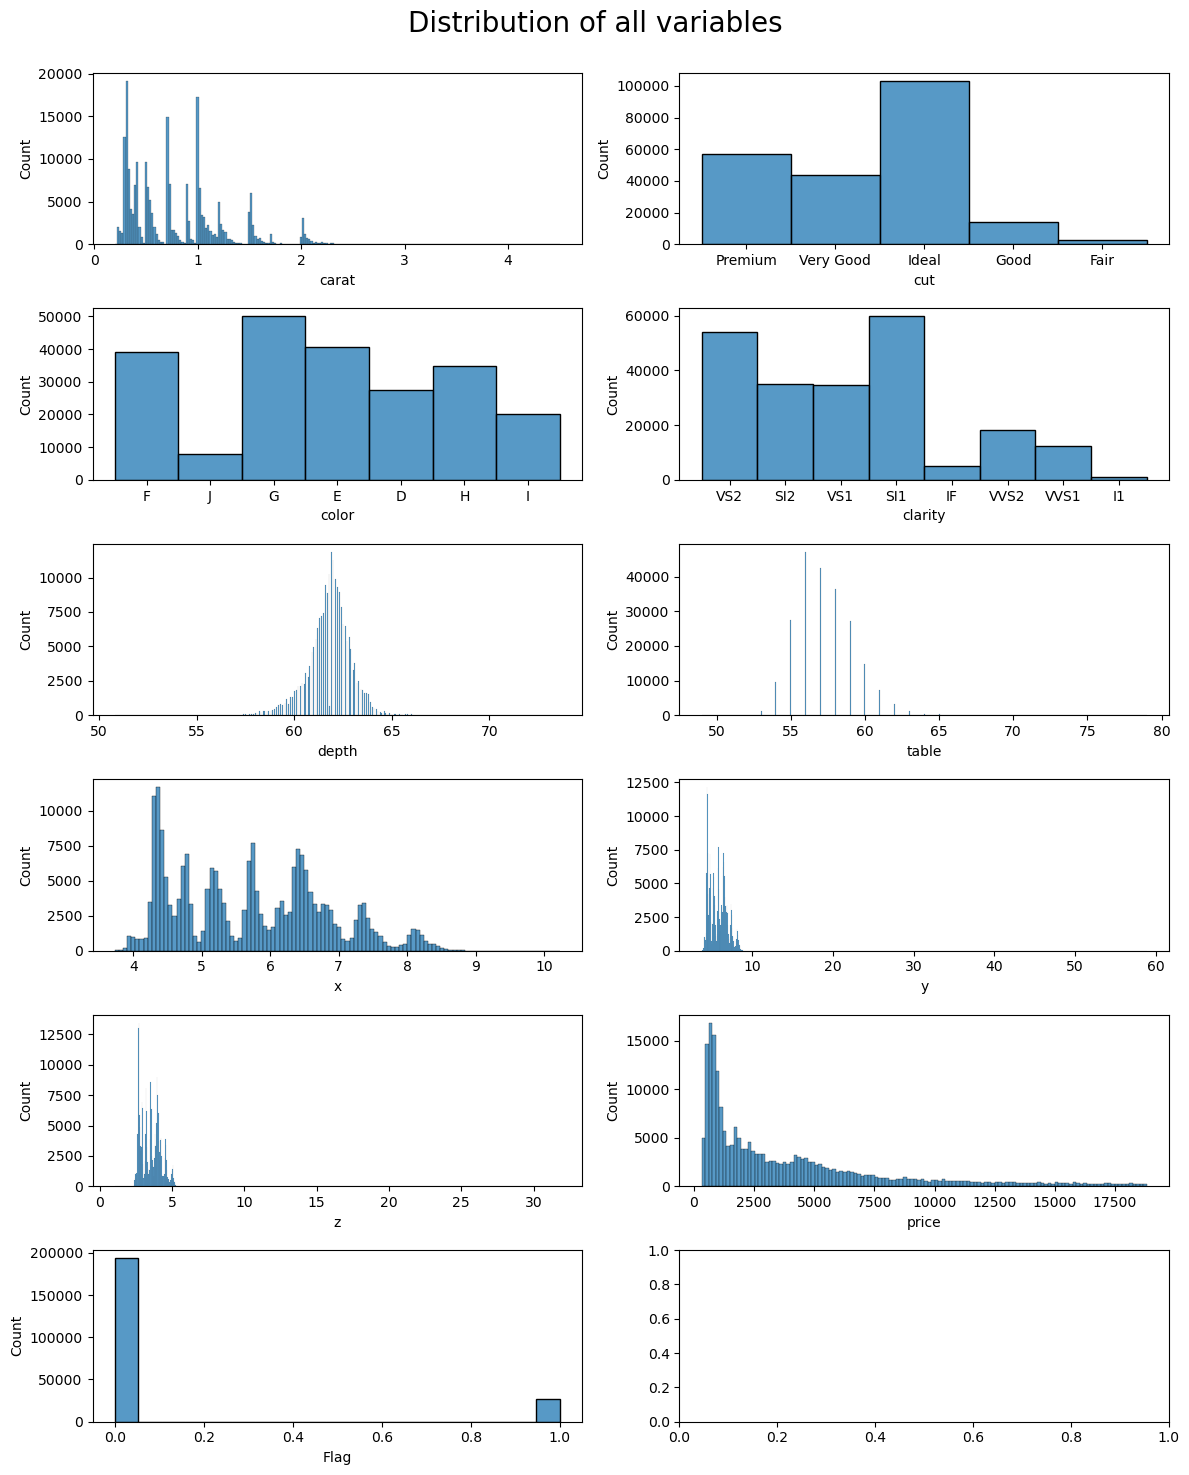

In [13]:
ncols = 2
nrows = np.ceil(len(train_df.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(train_df.columns, axs.flatten()):
    sns.histplot(train_df, x=c, ax=ax)
fig.suptitle('Distribution of all variables', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

<AxesSubplot:xlabel='price', ylabel='Count'>

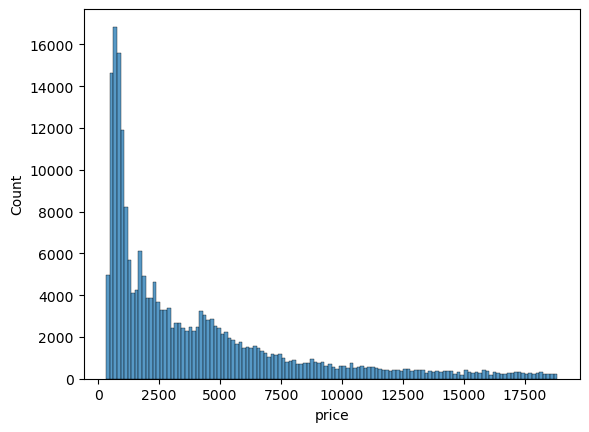

In [14]:
TARGET = "price"
sns.histplot(train_df[TARGET])

<AxesSubplot:xlabel='log_price', ylabel='Count'>

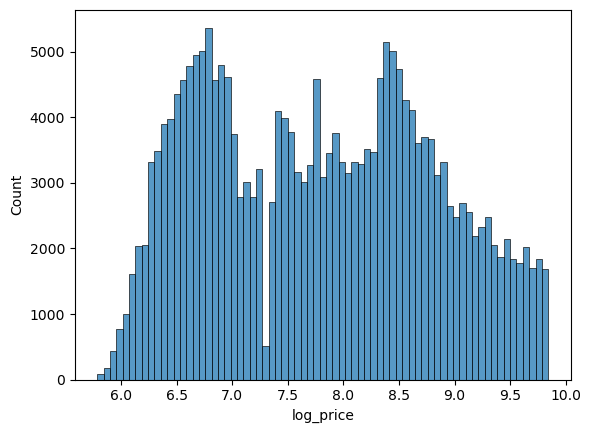

In [15]:
train_df['log_price'] = np.log(train_df[TARGET])
train_df.drop('price',axis=1,inplace=True)
TARGET = "log_price"
sns.histplot(train_df[TARGET])

In [16]:
numerical_feats = train_df.dtypes[train_df.dtypes != "object"].index
print("Numerical: ", len(numerical_feats))

categorical_feats = train_df.dtypes[train_df.dtypes == "object"].index
print("Categorical: ", len(categorical_feats))

Numerical:  8
Categorical:  3


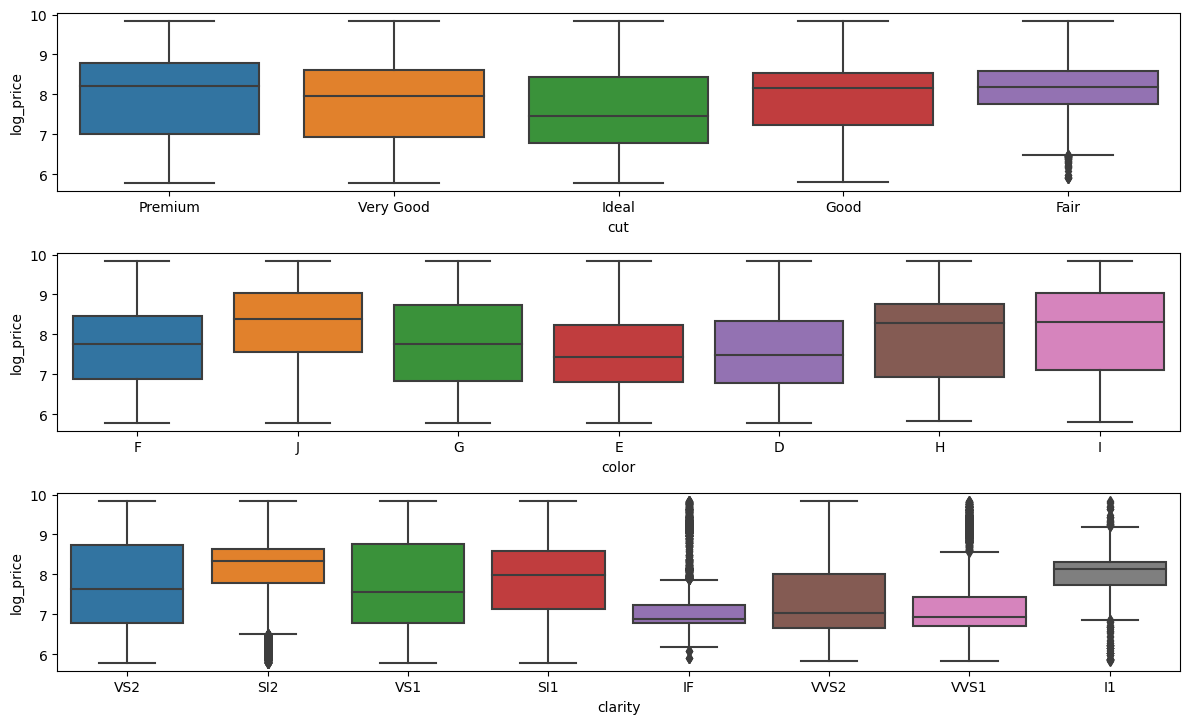

In [17]:
ncols = 1
nrows = np.ceil(len(categorical_feats)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(categorical_feats, axs.flatten()):
    sns.boxplot(data=train_df, x=c, y=TARGET ,ax=ax)
plt.tight_layout(rect=[0, 0, 1, 0.98])

In [18]:
X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1]
test = test_df

In [19]:
from sklearn.preprocessing import LabelEncoder
l = len(X)
df = pd.concat([X,test_df])
df['color'].replace({'D': 0, 'E': 1,'F': 2, 'G': 3,'H': 4, 'I': 5, 'J': 6},inplace=True)
df['clarity'].replace({'FL':0, 'IF':1, 'VVS1':2, 'VVS2':3, 'VS1':4, 'VS2':5, 'SI1':6, 'SI2':7, 'I1':8, 'I2':9, 'I3':10 },inplace=True)
df['cut'].replace({'Fair':4, 'Good':3, 'Very Good':2, 'Premium':1, 'Ideal':0}, inplace=True)
X = df[:l]
test = df[l:]

In [20]:
columns = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y','z','Flag']

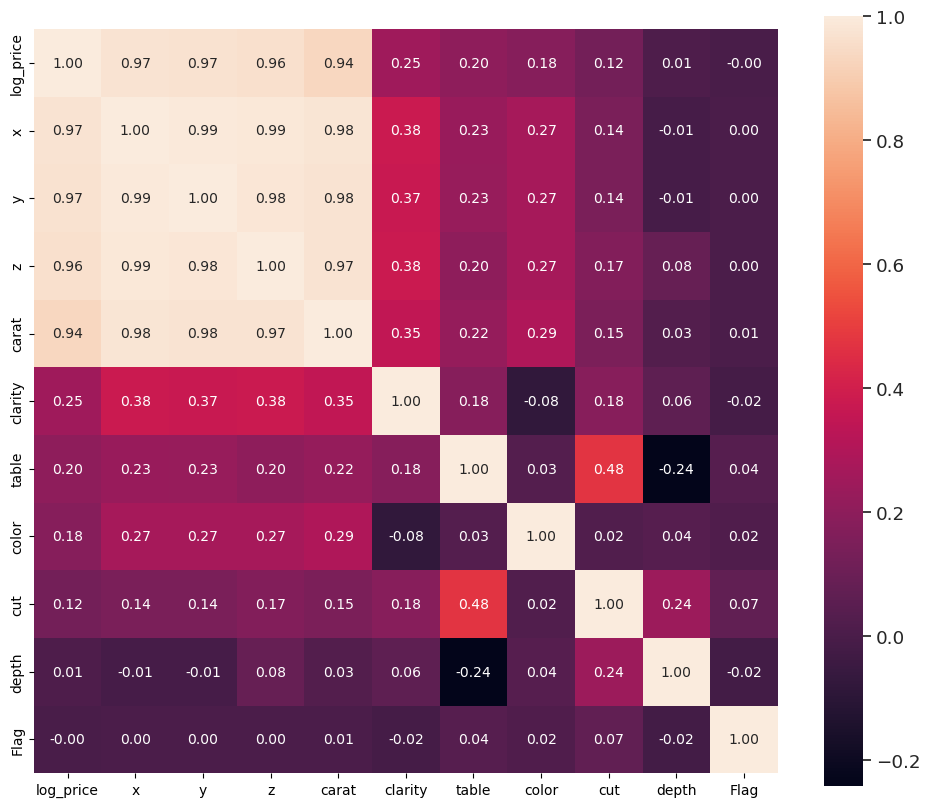

In [21]:
X = X[columns]
k = 15 # number of variables for heatmap
df = pd.concat([X,y],axis=1)
corrmat = df.corr()
cols = corrmat.nlargest(k, TARGET)[TARGET].index
cm = np.corrcoef(df[cols].values.T)
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(font_scale=1.2,font="IPAexGothic")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [22]:
import xgboost as xgb
import lightgbm as lgb
import catboost as cat
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold
import optuna

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,random_state=0)

In [37]:
N_split = 5
kf = KFold(n_splits=N_split)
def objective(trial):
    params = {
        'objective': 'regression',
        'boosting_type': 'gbdt',
        'metric': 'rmse',
        'learning_rate': trial.suggest_float("learning_rate", 0.04,0.4),
        'num_leaves': trial.suggest_int('num_leaves', 10, 1000),
        'colsample_bytree':trial.suggest_float("colsample", 0.1,0.3),
        'subsample': trial.suggest_float("subsample", 0.1,0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 100),
        'min_child_samples': trial.suggest_int('min_child_samples', 3, 2000),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'cat_smooth':trial.suggest_int('cat_smooth', 1, 100),
        'seed': 42,
        'n_estimators':2000
    }
            

    score_list = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        X_train = X.loc[train_idx][cols]
        X_valid = X.iloc[val_idx][cols]
        
       
        X_train_f = X_train
        y_train = y.loc[train_idx].values

        X_valid_f = X_valid
        y_valid = y.loc[val_idx].values


        model = lgb.LGBMRegressor(**params) 
        model.fit(        
                X_train_f,
                y_train,
                eval_set =[( X_valid_f,y_valid)],
                verbose =-1,
                early_stopping_rounds = 100)

        y_valid_pred = model.predict(X_valid_f)
        score = mean_squared_error(y_valid, y_valid_pred)
        score_list.append(score)
        
    return sum(score_list) / len(score_list)

try:
    cols = cols.drop(TARGET)
except:
    pass
lgb_study = optuna.create_study(direction='minimize')
lgb_study.optimize(objective, n_trials=10)
print(lgb_study.best_params)

[I 2023-03-01 12:34:18,810] A new study created in memory with name: no-name-e12a257d-bf9b-4a96-a015-7f0948407441
[I 2023-03-01 12:36:25,562] Trial 0 finished with value: 0.013667222101590746 and parameters: {'learning_rate': 0.29095606440411637, 'num_leaves': 502, 'colsample': 0.11538467223920393, 'subsample': 0.10654463623988059, 'max_depth': 96, 'min_child_samples': 1150, 'reg_alpha': 0.0005504656828323548, 'reg_lambda': 0.14815201613309548, 'cat_smooth': 31}. Best is trial 0 with value: 0.013667222101590746.
[I 2023-03-01 12:38:34,454] Trial 1 finished with value: 0.013660562855540927 and parameters: {'learning_rate': 0.3060272343003221, 'num_leaves': 189, 'colsample': 0.13216068653910487, 'subsample': 0.21540842617999065, 'max_depth': 23, 'min_child_samples': 1156, 'reg_alpha': 9.379420167739408e-05, 'reg_lambda': 0.0832754564788071, 'cat_smooth': 11}. Best is trial 1 with value: 0.013660562855540927.
[I 2023-03-01 12:40:15,705] Trial 2 finished with value: 0.01179576068186744 and

{'learning_rate': 0.2274041617353528, 'num_leaves': 871, 'colsample': 0.28807867422873956, 'subsample': 0.1535635434604345, 'max_depth': 6, 'min_child_samples': 1441, 'reg_alpha': 0.036002310799093516, 'reg_lambda': 0.49666251354815005, 'cat_smooth': 55}


In [38]:
lgb_params = lgb_study.best_params
add_params = {
        'objective':'regression', 
        'metric': 'rmse', 
        'task': 'train', 
        'seed': 42,
        'n_estimators':20000
        }
lgb_params.update(add_params)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,random_state=0)
model_lgb = lgb.LGBMRegressor(**lgb_params)
model_lgb.fit(X_train,
              y_train,
              eval_set=[(X_train, y_train),(X_valid, y_valid)],
              verbose=100,
              early_stopping_rounds=100)

[LightGBM] [Warning] Unknown parameter: colsample
[100]	training's rmse: 0.105466	valid_1's rmse: 0.10823
[200]	training's rmse: 0.104493	valid_1's rmse: 0.107547
[300]	training's rmse: 0.103953	valid_1's rmse: 0.107188
[400]	training's rmse: 0.103577	valid_1's rmse: 0.106985
[500]	training's rmse: 0.103244	valid_1's rmse: 0.106821
[600]	training's rmse: 0.102956	valid_1's rmse: 0.106684
[700]	training's rmse: 0.102766	valid_1's rmse: 0.106625
[800]	training's rmse: 0.102571	valid_1's rmse: 0.106549
[900]	training's rmse: 0.102376	valid_1's rmse: 0.106487
[1000]	training's rmse: 0.102208	valid_1's rmse: 0.106438
[1100]	training's rmse: 0.102035	valid_1's rmse: 0.106372
[1200]	training's rmse: 0.101878	valid_1's rmse: 0.106334
[1300]	training's rmse: 0.101731	valid_1's rmse: 0.106303
[1400]	training's rmse: 0.101559	valid_1's rmse: 0.106273
[1500]	training's rmse: 0.10143	valid_1's rmse: 0.106246
[1600]	training's rmse: 0.101307	valid_1's rmse: 0.106226
[1700]	training's rmse: 0.1012	va

LGBMRegressor(cat_smooth=55, colsample=0.28807867422873956,
              learning_rate=0.2274041617353528, max_depth=6, metric='rmse',
              min_child_samples=1441, n_estimators=20000, num_leaves=871,
              objective='regression', reg_alpha=0.036002310799093516,
              reg_lambda=0.49666251354815005, seed=42,
              subsample=0.1535635434604345, task='train')

In [39]:
N_split = 5
kf = KFold(n_splits=N_split)

def objective(trial):
   
    params = {
            'objective': 'reg:squarederror',
            'tree_method': 'hist',
            'grow_policy' : trial.suggest_categorical ('grow_policy', ['lossguide','depthwise']),
            'learning_rate':trial.suggest_loguniform('learning_rate', 0.01, 0.2),
            'max_depth': trial.suggest_int('max_depth', 3, 20),
            'reg_alpha': trial.suggest_loguniform('reg_alpha', 1, 10),
            'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-15, 10.0),
            'max_delta_step':trial.suggest_int('max_delta_step', 1, 10),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
            'colsample_bytree':trial.suggest_loguniform('colsample_bytree', 0.4, 1.0),
            'subsample': trial.suggest_loguniform('subsample', 0.4, 1.0),
            'seed':42
                }
    if params['grow_policy'] == 'lossguide':
        params['max_leaves'] = trial.suggest_int('max_leaves', 1, 100)   
        
        
    score_list = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        X_train = X.loc[train_idx][cols]
        X_valid = X.iloc[val_idx][cols]
        
       
        X_train_f = X_train
        y_train = y.loc[train_idx].values

        X_valid_f = X_valid
        y_valid = y.loc[val_idx].values


        model = xgb.XGBRegressor(**params) 
        model.fit(        
                X_train_f,
                y_train,
                eval_set =[( X_valid_f,y_valid)],
                verbose =0,
                early_stopping_rounds = 100)

        y_valid_pred = model.predict(X_valid_f)
        score = mean_squared_error(y_valid, y_valid_pred)
        score_list.append(score)
    return sum(score_list) / len(score_list)

try:
    cols = cols.drop(TARGET)
except:
    pass
xgb_study = optuna.create_study(direction='minimize')
xgb_study.optimize(objective, n_trials=10)
print(xgb_study.best_params)

[I 2023-03-01 12:54:17,358] A new study created in memory with name: no-name-0fe4c562-8e48-42ce-bead-5166e120fbb6
[I 2023-03-01 12:54:29,119] Trial 0 finished with value: 0.011026427546614209 and parameters: {'grow_policy': 'lossguide', 'learning_rate': 0.12421517092346346, 'max_depth': 10, 'reg_alpha': 6.330954280465647, 'reg_lambda': 2.5842894081998786e-07, 'max_delta_step': 10, 'min_child_weight': 207, 'colsample_bytree': 0.7961658963019459, 'subsample': 0.7468741398308634, 'max_leaves': 30}. Best is trial 0 with value: 0.011026427546614209.
[I 2023-03-01 12:54:35,073] Trial 1 finished with value: 16.6430924308098 and parameters: {'grow_policy': 'lossguide', 'learning_rate': 0.01670177351082035, 'max_depth': 10, 'reg_alpha': 5.789272817455756, 'reg_lambda': 2.7904693285758472e-06, 'max_delta_step': 2, 'min_child_weight': 132, 'colsample_bytree': 0.9811877040110674, 'subsample': 0.4166223923884308, 'max_leaves': 32}. Best is trial 0 with value: 0.011026427546614209.
[I 2023-03-01 12:

{'grow_policy': 'depthwise', 'learning_rate': 0.1510969558915232, 'max_depth': 19, 'reg_alpha': 4.1345312343413445, 'reg_lambda': 1.5021479856714745e-14, 'max_delta_step': 2, 'min_child_weight': 65, 'colsample_bytree': 0.9205721706878859, 'subsample': 0.7707158560390722}


In [40]:
xgb_params = xgb_study.best_params
add_params = {
        'objective': 'reg:squarederror',
        'seed':42,
        'n_estimators':20000
        }
xgb_params.update(add_params)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,random_state=0)
model_xgb = xgb.XGBRegressor(**xgb_params)
model_xgb.fit(X_train,
              y_train,
              eval_set=[(X_train, y_train),(X_valid, y_valid)],
              early_stopping_rounds=100,
              verbose=100)

[0]	validation_0-rmse:7.06303	validation_1-rmse:7.05890
[100]	validation_0-rmse:0.09707	validation_1-rmse:0.10333
[200]	validation_0-rmse:0.09555	validation_1-rmse:0.10330
[246]	validation_0-rmse:0.09505	validation_1-rmse:0.10334


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.9205721706878859, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1510969558915232,
             max_bin=256, max_cat_to_onehot=4, max_delta_step=2, max_depth=19,
             max_leaves=0, min_child_weight=65, missing=nan,
             monotone_constraints='()', n_estimators=20000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=4.1345312343413445, reg_lambda=1.5021479856714745e-14, ...)

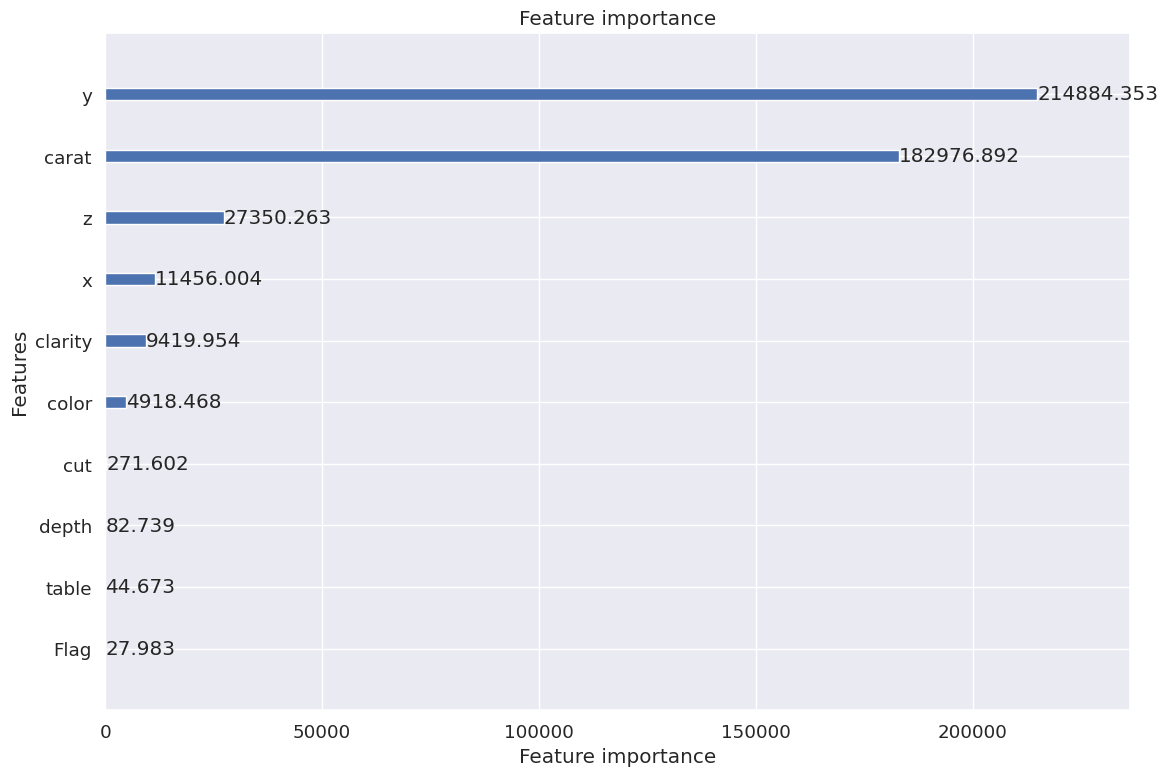

In [41]:
lgb.plot_importance(model_lgb, figsize=(12,8), max_num_features=50, importance_type='gain')
plt.tight_layout()
plt.show()
plt.close()

In [42]:
sub = pd.read_csv('/kaggle/input/playground-series-s3e8/sample_submission.csv')
sub

,id,price
0,193573,3969.155
1,193574,3969.155
2,193575,3969.155
3,193576,3969.155
4,193577,3969.155
...,...,...
129045,322618,3969.155
129046,322619,3969.155
129047,322620,3969.155
129048,322621,3969.155


In [45]:
y_xgb = model_xgb.predict(test)
y_pred_xgb_true = np.exp(y_xgb)
sub['price'] = y_pred_xgb_true
sub.to_csv('/kaggle/working/xgb12.csv',index=False)

In [48]:
y_lgb = model_lgb.predict(test)
y_pred_lgb_true = np.exp(y_lgb)
sub['price'] = y_pred_lgb_true
sub.to_csv('/kaggle/working/lgb12.csv',index=False)

In [47]:
sub["1"] = sub["price"]

In [49]:
sub["2"] = sub["price"]

In [50]:
sub["price"] = (sub["1"]+sub["2"])/2
sub.drop(["1","2"],inplace=True,axis=1)

In [53]:
sub.to_csv('/kaggle/working/mix1.csv',index=False)